In [18]:
pip install numPY --upgrade

You should consider upgrading via the 'C:\Users\ShodipeO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [19]:
#pip install statsmodels --upgrade
#numpy.__version__
import scipy as sci
import joblib as job
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV, MultiTaskLasso, MultiTaskElasticNetCV
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as sm

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import xgboost as xgb
from  xgboost import XGBRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

import statsmodels.formula.api as sms
#import statsmodels.api as sm




In [20]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras 
from tensorflow.keras import layers
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [21]:
import numpy as np
from numba.core import errors
#from statsforecast.models import croston_classic, croston_optimized, croston_sba
#from statsforecast.models import tsb as croston_tsb
from darts.logging import raise_if, raise_if_not
#from numba import njit
from scipy.optimize import minimize

from darts.models.forecasting.arima import ARIMA
from darts.models.forecasting.baselines import NaiveDrift, NaiveMean, NaiveSeasonal
from darts.models.forecasting.exponential_smoothing import ExponentialSmoothing
from darts.models.forecasting.fft import FFT
#from darts.models.forecasting.croston import Croston

from darts import TimeSeries
from sklearn.linear_model import LinearRegression

import numpy as numpy
#pip install numpy==1.20
import darts.datasets
from darts.models import StatsForecastAutoARIMA
from darts.models import RegressionModel
from darts.models import ExponentialSmoothing
from darts.models import RNNModel, BlockRNNModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.utils.timeseries_generation import datetime_attribute_timeseries
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)
 


C:\Users\ShodipeO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
%store -r glulamFeatures_traina
%store -r glulamFeatures_testa
%store -r glulamMargin_traina
%store -r glulamMargin_testa

In [37]:
glulamFeatures_traina_train=glulamFeatures_traina[glulamFeatures_traina.Date < '2022-05-01']
glulamFeatures_traina_test=glulamFeatures_traina[glulamFeatures_traina.Date >= '2022-05-01']


glulamMargin_traina_train=glulamMargin_traina[glulamMargin_traina.Date < '2022-05-01']
glulamMargin_traina_test=glulamMargin_traina[glulamMargin_traina.Date >= '2022-05-01']

In [38]:
glulamMargin_traina_timeseries= TimeSeries.from_group_dataframe(glulamMargin_traina_train,
                                                                group_cols=['Plant_Info'],
                                                                time_col='Date',
                                                                value_cols=['Margin_Stattransformed'])

glulam_transformed_data_Features_timeseries= TimeSeries.from_group_dataframe(glulamFeatures_traina_train,
                                                                group_cols=['Plant_Info'],
                                                                time_col='Date',
                                                                value_cols=['HousingStartstransformed', 'StatQtytransformed', 'NetWeighttransformed'])

#LinearRegression Forecasting

In [39]:

model=RegressionModel(
                       lags=[-1,-2],
                       lags_future_covariates=[0],
                       model=LinearRegression()
                       )

model.fit(glulamMargin_traina_timeseries, future_covariates=glulam_transformed_data_Features_timeseries)


In [40]:

glulamMargin_traina_timeseries_pred=model.predict(n=1, 
                                                  series=glulamMargin_traina_test[:13],
                                                  future_covariates=glulamFeatures_traina_test[:13])

KeyError: 0

In [ ]:
#print("Mape={:.2f}%".format(mape(glulamMargin_traina_timeseries,glulamMargin_traina_timeseries_pred)))

glulamMargin_traina_timeseries.plot(label="Predicted")
glulamMargin_traina_timeseries.plot(label="actual")
plt.legend()

C:\Users\ShodipeO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\darts\timeseries.py:4039: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  if isinstance(time_idx, pd.Int64Index) and not isinstance(
C:\Users\ShodipeO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\darts\timeseries.py:4039: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  if isinstance(time_idx, pd.Int64Index) and not isinstance(
C:\Users\ShodipeO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\darts\timeseries.py:4039: FutureWarning: pandas.Int64Index is deprecated and will be removed from pa

ValueError: x and y must be the same size

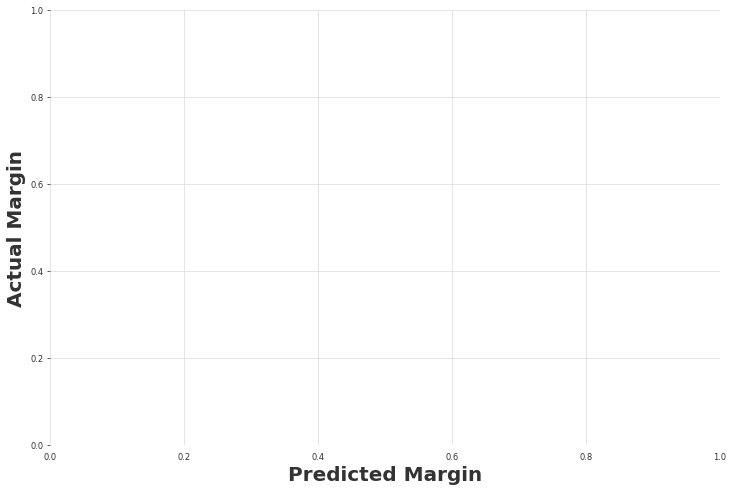

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel("Predicted Margin",fontsize=20)
plt.ylabel("Actual Margin",fontsize=20)
plt.grid(1)
plt.scatter(glulamMargin_traina_timeseries, glulamMargin_traina_timeseries_pred,edgecolors=(0,0,0),lw=2,s=80)
plt.ylim(0.02, 0.6)
plt.xlim(0.02,0.6)
xpoints=ypoints=plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)


# Linear Regression  regularization or cross validation (LASSO)

In [ ]:
lin_model1allL = LassoCV(cv=10,verbose=0,normalize=True,eps=0.000001,n_alphas=7, tol=0.0001,max_iter=50000000)

In [ ]:

lin_model1allL.fit(glulamFeatures_traina, glulamMargin_traina)

ValueError: could not convert string to float: '2020-01-01'

In [ ]:
Margin_pred_model1allL = lin_model1allL.predict(glulamFeatures_traina)

In [ ]:
#Train_Predict
print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_traina, Margin_pred_model1allL), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_traina, Margin_pred_model1allL), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_traina, Margin_pred_model1allL), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_traina, Margin_pred_model1allL), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_traina,Margin_pred_model1allL), 2))

Mean absolute error = 0.22
Mean squared error = 0.07
Median absolute error = 0.2
Explain variance score = 0.3
R2 score = 0.3


In [ ]:
pd.set_option('display.max_rows', None)
coeff_model1allL = pd.DataFrame(lin_model1allL.coef_[0:230], index=glulamFeatures_traina.columns[0:230], 
                          columns=['glulamMargin_traina'])
coeff_model1allL

glulamMargin_traina
HousingStartstransformed             0.663259
StatQtytransformed                  -0.192700
NetWeighttransformed                -0.031044

LogisticRegression

Neural Net


model = Sequential([
    Dense(16, input_shape=(29,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])
#optimizer=tf.keras.optimizer.RMSprop(0.001)
model.compile(Adam(lr=.0001), loss='mse', metrics=['mae','mse'])
Epochs=1000
#early_stop=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.fit(glulamFeatures_traina, glulamMargin_traina, batch_size=10, epochs=Epochs,  shuffle=True, verbose=2)
#Train_Predict
Margin_pred_model1allNeuralNet= model.predict(glulamFeatures_traina)


#Train_data

print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_traina,Margin_pred_model1allNeuralNet), 2))


#Re-run the model to visualize and so,  save the model in
lin_model1allNeuralNet=model.fit(glulamFeatures_traina, glulamMargin_traina, batch_size=10, epochs=Epochs, validation_split=0.2, shuffle=True, verbose=2, callbacks=[early_stop])
 

#Visuals lin_model1allNeuralNet.history
NeuralNetVisuals= pd.DataFrame(lin_model1allNeuralNet.history)
NeuralNetVisuals['Epoch']= lin_model1allNeuralNet.epoch
NeuralNetVisuals.tail()